In [25]:
import os

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
sns.set()
sns.set_context("paper", font_scale=1.2)

In [27]:
df = pd.read_csv("matching_scores.csv")
# drop the first column
df = df.drop(df.columns[0], axis=1)

In [28]:
df = df[df['reversed_best'] == False]

In [29]:
df_best = df.sort_values(by='score').groupby('file_name').first()
# only keep after last "/" in index
df_best.index = df_best.index.map(lambda x: x[x.rfind('/') + 1:])

In [30]:
df_best

,rotation,max_val,rotation_reverse,max_val_reverse,score,reversed_diff,reversed_best,roll,pitch,yaw,roll_reverse,pitch_reverse,yaw_reverse
file_name,,,,,,,,,,,,,
A231214_10300399.png,"roll: 344.00, pitch/theta/X: 47.79, yaw/phi/Y:...",128.548344,"roll: 344.00, pitch/theta/X: 47.79, yaw/phi/Y:...",126.658636,0.014299,-1.889708,False,344,47.787,-56.25,344,47.787,-56.25
A231214_10305286.png,"roll: 234.00, pitch/theta/X: 145.17, yaw/phi/Y...",125.687996,"roll: 234.00, pitch/theta/X: 145.17, yaw/phi/Y...",124.455971,0.017316,-1.232025,False,234,145.171,-69.75,234,145.171,-69.75
A231214_10312053.png,"roll: 112.00, pitch/theta/X: 262.62, yaw/phi/Y...",127.157174,"roll: 112.00, pitch/theta/X: 262.62, yaw/phi/Y...",126.400190,0.021630,-0.756984,False,112,262.616,-76.05,112,262.616,-76.05
A231214_10314883.png,"roll: 225.00, pitch/theta/X: 145.17, yaw/phi/Y...",131.653620,"roll: 225.00, pitch/theta/X: 145.17, yaw/phi/Y...",130.391188,0.024797,-1.262431,False,225,145.171,-69.75,225,145.171,-69.75
A231214_10321617.png,"roll: 26.00, pitch/theta/X: 128.04, yaw/phi/Y:...",98.844233,"roll: 26.00, pitch/theta/X: 128.04, yaw/phi/Y:...",98.672043,0.025288,-0.172190,False,26,128.036,-27.45,26,128.036,-27.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
A231214_11090174.png,"roll: 4.00, pitch/theta/X: 47.79, yaw/phi/Y: -...",124.598412,"roll: 4.00, pitch/theta/X: 47.79, yaw/phi/Y: -...",122.566446,0.013254,-2.031966,False,4,47.787,-56.25,4,47.787,-56.25
A231214_11094809.png,"roll: 359.00, pitch/theta/X: 47.79, yaw/phi/Y:...",127.398053,"roll: 359.00, pitch/theta/X: 47.79, yaw/phi/Y:...",125.442491,0.012719,-1.955562,False,359,47.787,-56.25,359,47.787,-56.25
A231214_11101656.png,"roll: 355.00, pitch/theta/X: 47.79, yaw/phi/Y:...",125.165564,"roll: 355.00, pitch/theta/X: 47.79, yaw/phi/Y:...",123.259979,0.014849,-1.905585,False,355,47.787,-56.25,355,47.787,-56.25


In [31]:
# get the list of files in folder that is .png
files = [file for file in os.listdir('.') if file.endswith('.png')]
files = sorted(files)
files_idx = list(range(len(files)))
# df_best replace file_name with index mapped
df_best.index = df_best.index.map(lambda x: files_idx[files.index(x)])

In [32]:
# only keep 'file_name', 'score', 'pitch', 'yaw', 'roll' columns
df_small = df_best[['score', 'pitch', 'yaw', 'roll']]

/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

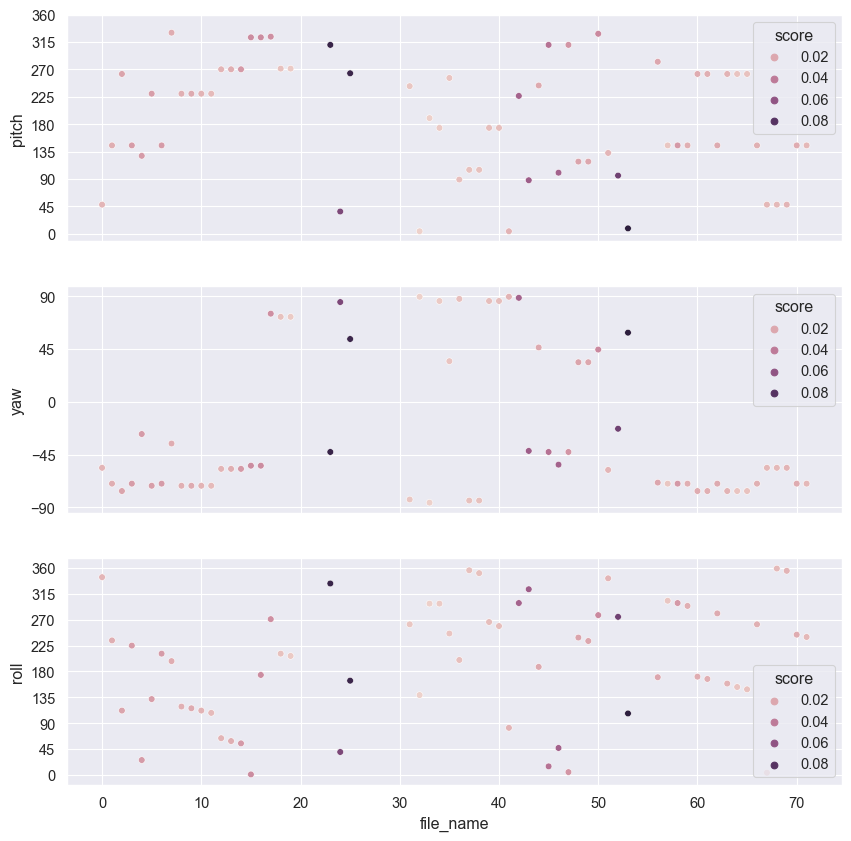

In [39]:
# plot roll, pitch, yaw in subplots with score as hue and file_name as x
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.scatterplot(ax=axes[0], data=df_best, x='file_name', y='pitch', hue='score');
axes[0].set_yticks(range(0, 361, 45));
sns.scatterplot(ax=axes[1], data=df_best, x='file_name', y='yaw', hue='score');
axes[1].set_yticks(range(-90, 91, 45));
sns.scatterplot(ax=axes[2], data=df_best, x='file_name', y='roll', hue='score');
axes[2].set_yticks(range(0, 361, 45));

In [42]:
df_small.to_csv("best_scores.csv")

In [55]:
df_small

,score,pitch,yaw,roll
file_name,,,,
0,0.014299,47.787,-56.25,344
1,0.017316,145.171,-69.75,234
2,0.021630,262.616,-76.05,112
3,0.024797,145.171,-69.75,225
4,0.025288,128.036,-27.45,26
...,...,...,...,...
67,0.013254,47.787,-56.25,4
68,0.012719,47.787,-56.25,359
69,0.014849,47.787,-56.25,355


In [58]:
# get pitch, yaw, roll for each index in for loop
for i in range(len(df)):
    print(i, df.iloc[i]['pitch'], df.iloc[i]['yaw'], df.iloc[i]['roll'])

0 47.787 -56.25 344.0
1 145.171 -69.75 234.0
2 262.616 -76.05 112.0
3 145.171 -69.75 225.0
4 128.036 -27.45 26.0
5 230.155 -71.55 132.0
6 145.171 -69.75 211.0
7 330.466 -35.55 198.0
8 230.155 -71.55 119.0
9 230.155 -71.55 116.0
10 230.155 -71.55 112.0
11 230.155 -71.55 108.0
12 270.28 -57.15 64.0
13 270.28 -57.15 59.0
14 270.28 -57.15 55.0
15 322.803 -54.45 1.0
16 322.803 -54.45 174.0
17 323.921 75.15 271.0
18 271.398 72.45 211.0
19 271.398 72.45 207.0
20 310.404 -42.75 333.0
21 36.506 85.05 40.0
22 263.734 53.55 164.0
23 242.554 -83.25 262.0
24 4.045 89.55 139.0
25 190.031 -85.95 298.0
26 174.014 85.95 298.0
27 256.071 34.65 246.0
28 89.03 87.75 200.0
29 105.047 -84.15 356.0
30 105.047 -84.15 351.0
31 174.014 85.95 266.0
32 174.014 85.95 259.0
33 4.045 89.55 82.0
34 226.537 88.65 299.0
35 87.911 -41.85 323.0
36 243.672 46.35 188.0
37 310.404 -42.75 15.0
38 100.311 -53.55 47.0
39 310.404 -42.75 5.0
40 118.564 33.75 239.0
41 118.564 33.75 233.0
42 328.657 44.55 278.0
43 132.772 -58.05 3

In [59]:
# read csv numpy
import numpy as np

array = np.loadtxt("best_scores.csv", delimiter=",", skiprows=1)
array

array([[ 0.00000000e+00,  1.42988668e-02,  4.77870000e+01,
        -5.62500000e+01,  3.44000000e+02],
       [ 1.00000000e+00,  1.73159501e-02,  1.45171000e+02,
        -6.97500000e+01,  2.34000000e+02],
       [ 2.00000000e+00,  2.16297817e-02,  2.62616000e+02,
        -7.60500000e+01,  1.12000000e+02],
       [ 3.00000000e+00,  2.47969956e-02,  1.45171000e+02,
        -6.97500000e+01,  2.25000000e+02],
       [ 4.00000000e+00,  2.52884769e-02,  1.28036000e+02,
        -2.74500000e+01,  2.60000000e+01],
       [ 5.00000000e+00,  2.41868179e-02,  2.30155000e+02,
        -7.15500000e+01,  1.32000000e+02],
       [ 6.00000000e+00,  2.53609399e-02,  1.45171000e+02,
        -6.97500000e+01,  2.11000000e+02],
       [ 7.00000000e+00,  1.79538242e-02,  3.30466000e+02,
        -3.55500000e+01,  1.98000000e+02],
       [ 8.00000000e+00,  1.69834331e-02,  2.30155000e+02,
        -7.15500000e+01,  1.19000000e+02],
       [ 9.00000000e+00,  1.86926204e-02,  2.30155000e+02,
        -7.15500000e+01

In [60]:
for i in range(len(array)):
    print(i, array[i][1], array[i][2], array[i][3])

0 0.0142988667992788 47.787 -56.25
1 0.0173159500868087 145.171 -69.75
2 0.0216297816514289 262.616 -76.05
3 0.024796995613894 145.171 -69.75
4 0.0252884768697045 128.036 -27.45
5 0.0241868178704657 230.155 -71.55
6 0.0253609399071257 145.171 -69.75
7 0.0179538242413067 330.466 -35.55
8 0.0169834331321154 230.155 -71.55
9 0.0186926203983303 230.155 -71.55
10 0.0150215047143954 230.155 -71.55
11 0.0121006499490353 230.155 -71.55
12 0.0149269951126328 270.28 -57.15
13 0.0172799245956136 270.28 -57.15
14 0.0262021533354902 270.28 -57.15
15 0.0318781583177831 322.803 -54.45
16 0.0317902325486646 322.803 -54.45
17 0.030278509580616 323.921 75.15
18 0.0096845572562251 271.398 72.45
19 0.0055913964478481 271.398 72.45
20 0.0908822689869359 310.404 -42.75
21 0.0665991973913768 36.506 85.05
22 0.0900693893892105 263.734 53.55
23 0.0075932533504682 242.554 -83.25
24 0.0026624806250885 4.045 89.55
25 0.0033535413664104 190.031 -85.95
26 0.0059195897103076 174.014 85.95
27 0.0079396719803132 256.0